## 📂 Loading Prediction Outcome with Pickle

Once the prediction results have been saved into `outcome.pkl`, they can be **reloaded** whenever needed.  
This avoids running the model again and ensures consistency across different modules.  

### 🔹 How It Works
1. Open the file `outcome.pkl` in **read-binary mode (`rb`)**.  
2. Use `pickle.load()` to deserialize the file contents back into a Python dictionary.  
3. The dictionary now contains the previously stored **risk probability** value.  

### 🔹 Example Reloaded Outcome
```python
{
  "risk_probability": 72.5
}


In [2]:
import pickle
with open("outcome.pkl", "rb") as f:
    outcome = pickle.load(f)

## 🥗 Loading the Diet Plan (JSON)

To provide personalized diet recommendations, the system needs to **load a pre-defined diet plan** stored in a JSON file.  

### 🔹 Function Purpose
The `load_diet_plan()` function:  
1. Opens the diet plan file (`Final_diet_plan.json`).  
2. Reads its contents using the **JSON module**.  
3. Converts the JSON into a **Python dictionary** for easy access.  
4. Returns the dictionary to be used in diet recommendation logic.  

### 🔹 Error Handling
If the file is missing or invalid:  
- The function catches the exception.  
- Prints an error message.  
- Returns an empty dictionary `{}` to avoid crashing.  

### ✅ Key Benefit
This ensures that diet recommendations can be dynamically updated just by **modifying the JSON file**, without changing the main code.  


## 🍴 Fetching Personalized Diet Recommendation

After loading the full diet plan, the system needs to **filter the correct diet** for a patient based on their health risk and food preference.  

### 🔹 Function Purpose
The `get_diet_recommendation()` function:  
1. Accepts three inputs:  
   - `diet_plan` → the loaded JSON diet dictionary  
   - `risk_category` → `"low"`, `"moderate"`, or `"high"`  
   - `is_vegetarian` → `True` for vegetarian, `False` for non-vegetarian  
2. Selects the correct branch in the JSON structure (`vegetarian` or `non_vegetarian`).  
3. Returns the **specific diet plan** that matches the patient’s risk level.  

### 🔹 Error Handling
- If the diet plan is empty → returns `None`.  
- If the requested category does not exist → prints an error and returns `None`.  

### ✅ Key Benefit
This makes the system **dynamic and flexible**, allowing automatic selection of the most appropriate diet without hardcoding menus.  


## 🍽️ Displaying the Personalized Diet Plan

Once the correct diet has been selected, the system presents it in a **clear and structured format** to the user.  

### 🔹 Function Purpose
The `display_diet_plan()` function:  
1. Takes the filtered diet dictionary as input.  
2. Prints a **sectioned meal plan** (Breakfast, Lunch, Snacks, Dinner).  
3. For each meal, displays:  
   - **Name of the dish**  
   - **Calories information**  
   - (Optional) **Image path** and **URL** for more details (currently commented out).  

### 🔹 Error Handling
- If no diet is available, it shows `"No diet plan available."`.  

### ✅ Key Benefit
This makes the diet plan **easy to read and understand**, and can later be extended to show images and clickable links in a web interface.  


## 🥗 Integrating Diet Suggestions with Risk Prediction

Once the heart disease risk has been predicted, the system automatically recommends a **personalized diet plan**.

### 🔹 Function Purpose
The `integrate_diet_suggestion()` function connects the **risk prediction** with the **diet recommendation module**.

### 🔹 Steps Performed
1. **Load Diet Data**  
   - Reads the diet plan JSON file (`Final_diet_plan.json`).  
   - If unavailable, exits gracefully.  

2. **Ask for User Preference**  
   - Prompts the user whether they are vegetarian or non-vegetarian.  
   - Stores choice as `is_veg`.  

3. **Decide Risk Category**  
   - Uses the predicted **risk probability** to classify into:  
     - `low_risk` → ≤ 30%  
     - `moderate_risk` → 31–70%  
     - `high_risk` → > 70%  

4. **Fetch Appropriate Diet**  
   - Calls `get_diet_recommendation()` with risk level and diet type.  

5. **Display Diet Plan**  
   - Calls `display_diet_plan()` to show the structured meal plan.  

### ✅ Key Benefit
This creates a **seamless pipeline**:  
Prediction → Risk Level → Diet Selection → **Personalized Diet Display**.  


## 🍽️ Advanced Diet Recommendation with Randomized Charts

To make the diet suggestions **more interactive and personalized**, we extend the system to generate **multiple randomized diet charts**.  
This gives the user flexibility and variety in selecting meals while still aligning with their health risk level.

---

### 🔹 Key Components

1. **`load_diet_plan()`**
   - Loads the diet plan JSON file.  
   - Returns structured data containing vegetarian and non-vegetarian options.

2. **`get_diet_recommendation()`**
   - Fetches the correct diet plan based on:
     - **Risk category** (`low_risk`, `moderate_risk`, `high_risk`)  
     - **Diet preference** (vegetarian or non-vegetarian).

3. **`create_random_diet_charts()`**
   - Randomly generates multiple daily charts (default: 3).  
   - Each chart contains:
     - **Breakfast**: 2 items  
     - **Lunch**: 3 items  
     - **Snacks**: 2 items  
     - **Dinner**: 3 items  
   - Tracks total daily calorie intake for comparison.

4. **`display_single_diet_chart()`**
   - Shows one chart in a **detailed format** with calorie breakdowns.  

5. **`display_all_diet_charts()`**
   - Displays **all generated charts one by one**.  
   - Includes a **calorie comparison table**.  
   - Suggests the **most balanced chart** closest to the average calorie intake.

6. **`display_compact_charts()`**
   - Presents charts in a **side-by-side comparison table**.  
   - Helps the user quickly compare options.

7. **`integrate_diet_suggestion_with_charts()`**
   - End-to-end flow:
     1. Loads the JSON diet plan.  
     2. Asks user whether they are vegetarian or not.  
     3. Determines **risk category** based on probability:
        - 🟢 Low Risk → Maintenance diet  
        - 🟡 Moderate Risk → Balanced diet  
        - 🔴 High Risk → Strict diet  
     4. Asks user how many charts to generate (1–3).  
     5. Generates random charts and displays them with detailed + comparison views.  

---

### ✅ Benefits of this Extended System
- Provides **variety** instead of a fixed meal plan.  
- Allows **user choice** between multiple balanced charts.  
- Highlights **total calories** for informed decision-making.  
- Makes the diet recommendation system **more engaging and user-friendly**.  


## 1️⃣ Import Required Libraries

This section imports all the necessary Python libraries for our diet recommendation system:

```python
import json                  # For reading and writing diet plan JSON files
import random                # For randomly selecting meal items
import requests              # For fetching images from URLs
from collections import defaultdict  # For flexible dictionary structures

from icrawler.builtin import GoogleImageCrawler  # For crawling images from Google
from icrawler import ImageDownloader             # Custom downloader to collect URLs

from IPython.display import display, Image  # Display images directly in Jupyter Notebook
import matplotlib.pyplot as plt             # Plotting images in grids
from PIL import Image as PILImage           # Image manipulation and conversion
from io import BytesIO                      # Handling images in memory
import time                                 # Retry delays and timing control


In [3]:
import json
import random
import requests
from collections import defaultdict
from icrawler.builtin import GoogleImageCrawler
from icrawler import ImageDownloader
from IPython.display import display, Image
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO
import time

## 2️⃣ Custom Image Downloader: URLCollector

The `URLCollector` is a specialized component that **collects image URLs from search results** instead of downloading the images locally.  

### Key Features:
- **No local storage:** Skips saving files, keeping the workflow lightweight.
- **URL collection:** Maintains a list of all retrieved image URLs for later use.
- **Efficient fetching:** Enables on-demand image loading directly in memory, ideal for notebooks.
- **Integration-ready:** Works seamlessly with image crawlers to gather multiple food image URLs for diet charts.


In [4]:
# Custom pipeline: collect URLs instead of downloading
class URLCollector(ImageDownloader):
    def get_filename(self, task, default_ext):
        return None  # skip file saving

    def download(self, task, default_ext, timeout=5, **kwargs):
        file_url = task['file_url']
        if not hasattr(self, "collected_urls"):
            self.collected_urls = []
        self.collected_urls.append(file_url)
        return

## 2️⃣ Custom Image Downloader: URLCollector

The `URLCollector` is a specialized component that **collects image URLs from search results** instead of downloading the images locally.  

### Key Features:
- **No local storage:** Skips saving files, keeping the workflow lightweight.
- **URL collection:** Maintains a list of all retrieved image URLs for later use.
- **Efficient fetching:** Enables on-demand image loading directly in memory, ideal for notebooks.
- **Integration-ready:** Works seamlessly with image crawlers to gather multiple food image URLs for diet charts.


In [20]:
class DietImageURLCrawler:
    def __init__(self, max_retries=3):
        """Initialize the URL-based crawler with retry logic"""
        self.max_retries = max_retries

    def get_image_urls(self, query, max_num=3):  # Get more URLs for better retry chances
        """Get image URLs for a food item without downloading"""
        for attempt in range(self.max_retries):
            try:
                collector = URLCollector
                crawler = GoogleImageCrawler(
                    downloader_cls=collector,
                    storage={'root_dir': None},
                    log_level=40  # Reduce logging noise
                )
                crawler.crawl(keyword=f"{query} food", max_num=max_num)

                if hasattr(crawler.downloader, 'collected_urls'):
                    return crawler.downloader.collected_urls

            except Exception as e:
                print(f"Attempt {attempt + 1} failed for {query}: {e}")
                if attempt < self.max_retries - 1:
                    time.sleep(1)  # Wait before retry
                    continue
                else:
                    print(f"Failed to get URLs for {query} after {self.max_retries} attempts")

        return []

    def load_image_from_url(self, url, timeout=10):
        """Load PIL Image from URL with retry logic"""
        for attempt in range(self.max_retries):
            try:
                response = requests.get(url, timeout=timeout)
                response.raise_for_status()
                img = PILImage.open(BytesIO(response.content))
                # Convert to RGB if necessary
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                return img
            except Exception as e:
                print(f"Attempt {attempt + 1} failed loading {url}: {e}")
                if attempt < self.max_retries - 1:
                    time.sleep(1)  # Wait before retry
                    continue

        print(f"Failed to load image from {url} after {self.max_retries} attempts")
        return None

    def get_image_with_retry(self, food_name):
        """Get image for food item with multiple URL attempts"""
        urls = self.get_image_urls(food_name, max_num=5)  # Get multiple URLs

        for url in urls:
            img = self.load_image_from_url(url)
            if img:
                return img

        return None

### 🔹 Load Image from URL

This method is responsible for **loading images from a given URL** into memory as a PIL Image object.

**Key Features:**
- **Retry mechanism:** Tries multiple times to fetch the image in case of network or server issues.
- **Error handling:** Gracefully handles failed requests without crashing the program.
- **In-memory loading:** Uses `BytesIO` to load images directly into memory.
- **RGB conversion:** Ensures all images are converted to RGB format for consistent display and processing.
- **Timeout control:** Prevents the program from hanging on slow or unresponsive URLs.


In [6]:
def load_image_from_url(self, url, timeout=10):
        """Load PIL Image from URL with retry logic"""
        for attempt in range(self.max_retries):
            try:
                response = requests.get(url, timeout=timeout)
                response.raise_for_status()
                img = PILImage.open(BytesIO(response.content))
                # Convert to RGB if necessary
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                return img
            except Exception as e:
                print(f"Attempt {attempt + 1} failed loading {url}: {e}")
                if attempt < self.max_retries - 1:
                    time.sleep(1)  # Wait before retry
                    continue
        
        print(f"Failed to load image from {url} after {self.max_retries} attempts")
        return None

### 🔹 Get Image with Retry

This method retrieves an image for a specific food item by:

- **Fetching multiple URLs:** Uses the crawler to gather several possible image sources.
- **Attempting multiple loads:** Tries each URL in sequence until a valid image is successfully loaded.
- **Reliable image retrieval:** Ensures that even if some URLs fail, the method can still return a usable image.
- **Returns:** A PIL Image object if successful, or `None` if all attempts fail.


In [7]:
def get_image_with_retry(self, food_name):
        """Get image for food item with multiple URL attempts"""
        urls = self.get_image_urls(food_name, max_num=5)  # Get multiple URLs
        
        for url in urls:
            img = self.load_image_from_url(url)
            if img:
                return img
        
        return None

## 4️⃣ Load Diet Plan

The `load_diet_plan` function reads the diet plan data from a JSON file.

### Key Features:
- **File-based storage:** Loads structured diet plans for vegetarian and non-vegetarian options.
- **Error handling:** Catches file read or JSON parsing errors gracefully.
- **Returns:** A dictionary containing all diet data if successful, or an empty dictionary if the file cannot be loaded.
- **Default path:** Uses `"Diet/Final_diet_plan.json"` unless a different path is specified.


In [8]:
def load_diet_plan(file_path="Diet/Final_diet_plan.json"):
    """Load diet plan JSON from file"""
    try:
        with open(file_path, "r") as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading diet plan: {e}")
        return {}

## 5️⃣ Get Diet Recommendation

This function retrieves the **appropriate diet plan** based on the user's health risk and dietary preference.

### Key Features:
- **Diet type selection:** Differentiates between vegetarian and non-vegetarian options.
- **Risk-based filtering:** Returns diet items corresponding to the specified risk category (`low_risk`, `moderate_risk`, `high_risk`).
- **Error handling:** Gracefully handles cases where no matching diet plan exists.
- **Returns:** A dictionary containing meal options (breakfast, lunch, snacks, dinner) or `None` if no data is found.


In [9]:
def get_diet_recommendation(diet_plan, risk_category, is_vegetarian=True):
    """Fetch diet plan based on risk level and diet preference"""
    if not diet_plan:
        return None

    diet_type = "vegetarian" if is_vegetarian else "non_vegetarian"

    try:
        return diet_plan["diet_plan"][diet_type][risk_category.lower()]
    except KeyError:
        print("No matching diet plan found.")
        return None

## 6️⃣ Create Random Diet Charts

This function generates **multiple randomized daily diet charts** from the available diet data.

### Key Features:
- **Multiple charts:** Can generate several options (default: 3) to provide variety to the user.
- **Meal structure:** Includes breakfast, lunch, snacks, and dinner with a predefined number of items per meal.
- **Random selection:** Picks meals randomly from the available diet options to create unique charts each time.
- **Calorie tracking:** Calculates total daily calories for each chart to help compare and select the most balanced option.
- **Returns:** A list of diet charts, each containing selected meals and total calories.


In [10]:
def create_random_diet_charts(diet_data, num_charts=3):
    """Create random diet charts with breakfast, lunch, snacks, and dinner"""
    if not diet_data:
        print("No diet data available.")
        return []

    # Define meal types and how many items to select for each
    meal_config = {
        'breakfast':2,  # 2 breakfast items
        'lunch': 3,      # 3 lunch items
        'snacks': 2,     # 2 snack items
        'dinner': 3      # 3 dinner items
    }

    diet_charts = []

    for chart_num in range(1, num_charts + 1):
        chart = {}
        total_calories = 0

        for meal_type, num_items in meal_config.items():
            if meal_type in diet_data and diet_data[meal_type]:
                # Randomly select items from available options
                available_items = diet_data[meal_type]
                selected_items = random.sample(
                    available_items,
                    min(num_items, len(available_items))
                )
                chart[meal_type] = selected_items

                # Calculate calories for this meal
                meal_calories = sum(item['calories'] for item in selected_items)
                total_calories += meal_calories
            else:
                chart[meal_type] = []

        chart['total_calories'] = total_calories
        chart['chart_number'] = chart_num
        diet_charts.append(chart)

    return diet_charts

### 🔹 Chart Generation Logic

For each diet chart:

- **Initialize chart:** Create an empty structure to hold meals and calorie totals.
- **Random meal selection:**  
  - For each meal type (breakfast, lunch, snacks, dinner), randomly select the predefined number of items from the available options.  
  - Ensures variety in each generated chart.
- **Calorie calculation:** Sum the calories of all selected items to get the total daily intake for the chart.
- **Chart metadata:** Assign a unique chart number and store total calories.
- **Aggregation:** Append each completed chart to the list of diet charts.
- **Return value:** A list of diet charts ready for display and comparison.


## 7️⃣ Display Single Diet Chart with Images

This function shows **one complete diet chart**, either as text-only or with images.

### Key Features:

- **Header info:** Displays chart number and total daily calories.
- **Text-only mode:**  
  - Uses meal-specific emojis (🌅, 🌞, 🍎, 🌙) for breakfast, lunch, snacks, and dinner.  
  - Lists each food item with its calorie value.
- **Image mode:**  
  - Fetches images for each food item using the `DietImageURLCrawler`.  
  - Shows images immediately after retrieval with readable titles (food name + calories).  
  - Provides visual clarity and enhances engagement.
- **Error handling:** Prints a message if an image cannot be loaded.
- **Flexible crawler usage:** Accepts a crawler instance or creates a new one for on-demand image fetching.


In [11]:
def display_single_diet_chart_with_images(chart, chart_num, show_images=True, crawler=None):
    """Display a single diet chart with optional images - renders immediately when ready"""
    print(f"\n{'='*70}")
    print(f"🍽️  DIET CHART #{chart_num}")
    print(f"📊 Total Daily Calories: {chart.get('total_calories', 0)} cal")
    print(f"{'='*70}")
    
    if not show_images:
        # Text-only display
        meal_emojis = {
            'breakfast': '🌅',
            'lunch': '🌞', 
            'snacks': '🍎',
            'dinner': '🌙'
        }
        
        for meal_type in ['breakfast', 'lunch', 'snacks', 'dinner']:
            if meal_type in chart and chart[meal_type]:
                emoji = meal_emojis.get(meal_type, '🍽️')
                meal_calories = sum(item['calories'] for item in chart[meal_type])
                
                print(f"\n{emoji} {meal_type.upper()} ({meal_calories} cal):")
                print("-" * 40)
                
                for i, item in enumerate(chart[meal_type], 1):
                    print(f"  {i}. {item['name']} - {item['calories']} cal")
        return
    
    # Display with images - render immediately for each meal
    if not crawler:
        crawler = DietImageURLCrawler(max_retries=4)
    
    meal_emojis = {'breakfast': '🌅', 'lunch': '🌞', 'snacks': '🍎', 'dinner': '🌙'}
    
    for meal_type in ['breakfast', 'lunch', 'snacks', 'dinner']:
        if meal_type in chart and chart[meal_type]:
            emoji = meal_emojis.get(meal_type, '🍽️')
            meal_calories = sum(item['calories'] for item in chart[meal_type])
            
            print(f"\n{emoji} {meal_type.upper()} ({meal_calories} cal) - Chart #{chart_num}")
            print("-" * 55)
            
            # Collect images for this meal
            meal_images = []
            meal_items = []
            
            for item in chart[meal_type]:
                food_name = item['name']
                calories = item['calories']
                
                print(f"🔍 Fetching image for: {food_name}")
                img = crawler.get_image_with_retry(food_name)
                
                if img:
                    meal_images.append(img)
                    meal_items.append({'name': food_name, 'calories': calories})
                    print(f"✅ Successfully loaded: {food_name}")
                else:
                    print(f"❌ Could not load image for: {food_name}")
            
            # Display images for this meal immediately
            if meal_images:
                display_meal_images(meal_images, meal_items, meal_type, emoji, chart_num)
            else:
                print(f"No images available for {meal_type}")

### 🔹 Display Meal Images

This function handles the **visual layout of a single meal's images** within a diet chart.

### Key Features:
- **Dynamic layout:** Adjusts rows and columns based on the number of food items for optimal display.
- **Image titles:** Each image is labeled with the food name and its calorie count.
- **Borders & styling:** Adds light-gray borders for clarity and better visual separation.
- **Handles unused subplots:** Hides any empty spaces in the grid.
- **Overall meal summary:** Displays a clear title with meal type, chart number, total calories, and number of items.
- **Immediate rendering:** Shows images inline in Jupyter Notebook for quick review.


In [12]:
def display_meal_images(meal_images, meal_items, meal_type, emoji, chart_num):
    """Display images for a single meal with improved layout"""
    num_items = len(meal_images)
    
    # Determine optimal layout
    if num_items <= 2:
        cols, rows = num_items, 1
        figsize = (6 * cols, 4)
    elif num_items <= 4:
        cols, rows = min(2, num_items), (num_items + 1) // 2
        figsize = (8, 4 * rows)
    else:
        cols, rows = 3, (num_items + 2) // 3
        figsize = (12, 3 * rows)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Handle single subplot case
    if rows == 1 and cols == 1:
        axes = [axes]
    elif rows == 1 or cols == 1:
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    else:
        axes = axes.flatten()
    
    # Display each food item
    for i, (img, item) in enumerate(zip(meal_images, meal_items)):
        if i < len(axes):
            axes[i].imshow(img)
            
            # Create clean, readable title
            title = f"{item['name']}\n{item['calories']} calories"
            axes[i].set_title(title, fontsize=11, fontweight='bold', pad=15)
            axes[i].axis('off')
            
            # Add border around image
            for spine in axes[i].spines.values():
                spine.set_visible(True)
                spine.set_color('lightgray')
                spine.set_linewidth(2)
    
    # Hide unused subplots
    for i in range(num_items, len(axes)):
        axes[i].axis('off')
        axes[i].set_visible(False)
    
    # Set overall title with better formatting
    meal_title = f"{emoji} {meal_type.upper()} - Chart #{chart_num}"
    total_meal_calories = sum(item['calories'] for item in meal_items)
    subtitle = f"Total: {total_meal_calories} calories | {len(meal_items)} items"
    
    plt.suptitle(f"{meal_title}\n{subtitle}", 
                fontsize=14, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Make room for title
    plt.show()

## 8️⃣ Display All Diet Charts with Images

This function presents **all generated diet charts** sequentially with optional images.

### Key Features:
- **Header and separation:** Uses emojis and lines to clearly distinguish sections.
- **Single crawler instance:** Optimizes performance when fetching multiple images.
- **Immediate chart display:** Shows each chart as soon as it’s generated, including images if enabled.
- **Calorie summary:** Prints a comparison table of total calories for each chart.
- **Balanced recommendation:** Highlights the chart closest to the average calorie intake as the most balanced option.
- **Flexible display:** Can switch between text-only or image-rich views depending on user preference.


In [13]:
def display_all_diet_charts_with_images(diet_charts, show_images=True):
    """Display all generated diet charts with immediate rendering"""
    if not diet_charts:
        print("No diet charts generated.")
        return
    
    print("\n" + "🎯" * 25)
    print("🍽️  YOUR PERSONALIZED DIET CHART OPTIONS")
    print("🎯" * 25)
    
    # Create a single crawler instance for better performance
    crawler = DietImageURLCrawler(max_retries=4) if show_images else None
    
    # Display each chart as soon as it's ready
    for chart in diet_charts:
        print(f"\n🎲 Processing Diet Chart #{chart['chart_number']}...")
        display_single_diet_chart_with_images(chart, chart['chart_number'], show_images, crawler)
        
        # Add separator between charts
        if show_images:
            print(f"\n{'─' * 70}")
    
    # Summary comparison at the end
    print(f"\n{'='*70}")
    print("📊 CALORIE COMPARISON SUMMARY")
    print(f"{'='*70}")
    
    for chart in diet_charts:
        chart_num = chart['chart_number']
        total_cal = chart.get('total_calories', 0)
        print(f"📈 Chart #{chart_num}: {total_cal} calories")
    
    # Recommend the most balanced chart
    if len(diet_charts) > 1:
        avg_calories = sum(chart.get('total_calories', 0) for chart in diet_charts) / len(diet_charts)
        closest_chart = min(diet_charts, key=lambda x: abs(x.get('total_calories', 0) - avg_calories))
        print(f"\n💡 RECOMMENDATION: Chart #{closest_chart['chart_number']} ")
        print(f"   ({closest_chart.get('total_calories', 0)} cal) - Most balanced option")

## 9️⃣ Display Diet Charts in Grid View

This function shows **all generated diet charts in an organized grid layout** for easy comparison.

### Key Features:
- **Grid format:** Displays all meals and food items in a chart together, rather than one meal at a time.
- **Image fetching:** Uses a single crawler instance to fetch images for all food items efficiently.
- **Meal sections:** Keeps track of meal types (breakfast, lunch, snacks, dinner) to provide structured visualization.
- **Labels & calories:** Each image is labeled with its food name, emoji, and calorie count.
- **Immediate rendering:** Shows each chart grid as soon as images are ready.
- **Error handling:** Prints informative messages if an image cannot be loaded for any food item.


In [14]:
def display_chart_grid_view(diet_charts):
    """Display all charts in organized grid format with immediate rendering"""
    if not diet_charts:
        print("No diet charts generated.")
        return
    
    crawler = DietImageURLCrawler(max_retries=4)
    
    print("🔍 Generating grid view for all diet charts...")
    
    for chart in diet_charts:
        print(f"\n📊 Processing Chart #{chart['chart_number']} for grid view...")
        
        # Collect all food items for this chart
        all_images = []
        all_labels = []
        meal_sections = []
        
        meal_types = ['breakfast', 'lunch', 'snacks', 'dinner']
        meal_emojis = {'breakfast': '🌅', 'lunch': '🌞', 'snacks': '🍎', 'dinner': '🌙'}
        
        for meal_type in meal_types:
            if meal_type in chart and chart[meal_type]:
                meal_start = len(all_images)
                
                for item in chart[meal_type]:
                    food_name = item['name']
                    calories = item['calories']
                    
                    print(f"  🔍 Fetching: {food_name}")
                    img = crawler.get_image_with_retry(food_name)
                    
                    if img:
                        emoji = meal_emojis.get(meal_type, '🍽️')
                        all_images.append(img)
                        all_labels.append(f"{emoji} {food_name}\n{calories} cal")
                        print(f"    ✅ Loaded: {food_name}")
                    else:
                        print(f"    ❌ Failed: {food_name}")
                
                if len(all_images) > meal_start:
                    meal_sections.append({
                        'type': meal_type,
                        'start': meal_start,
                        'end': len(all_images),
                        'emoji': meal_emojis.get(meal_type, '🍽️')
                    })
        
        # Display grid for this chart immediately
        if all_images:
            display_chart_grid(all_images, all_labels, chart, meal_sections)
        else:
            print(f"❌ No images loaded for Chart #{chart['chart_number']}")

## 🔟 Display a Single Diet Chart in Grid Format

This function renders a **single diet chart as a comprehensive grid**, organizing all meals and food items together.

### Key Features:
- **Flexible grid layout:** Automatically calculates rows and columns based on the number of images.
- **Image display:** Shows each food item with its corresponding image.
- **Labels & calories:** Each image is labeled with the food name, emoji, and calorie count.
- **Subtle styling:** Adds light-colored borders and hides unused subplots for a clean look.
- **Meal breakdown:** Provides a summary of items per meal type for better readability.
- **Overall chart info:** Displays chart number, total daily calories, and total food items at the top.
- **Immediate rendering:** Suitable for Jupyter notebooks, showing the grid as soon as images are loaded.


In [15]:
def display_chart_grid(images, labels, chart, meal_sections):
    """Display a single chart in grid format with meal sections"""
    num_images = len(images)
    cols = min(4, num_images)
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
    
    # Handle subplot arrangement
    if num_images == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if hasattr(axes, '__len__') else [axes]
    else:
        axes = axes.flatten()
    
    # Display images
    for i, (img, label) in enumerate(zip(images, labels)):
        if i < len(axes):
            axes[i].imshow(img)
            axes[i].set_title(label, fontsize=10, fontweight='bold', pad=10)
            axes[i].axis('off')
            
            # Add subtle border
            for spine in axes[i].spines.values():
                spine.set_visible(True)
                spine.set_color('lightblue')
                spine.set_linewidth(1)
    
    # Hide unused subplots
    for i in range(num_images, len(axes)):
        axes[i].axis('off')
        axes[i].set_visible(False)
    
    # Create informative title
    chart_num = chart['chart_number']
    total_calories = chart.get('total_calories', 0)
    
    title = f"🍽️ Complete Diet Chart #{chart_num}"
    subtitle = f"Total Daily Intake: {total_calories} calories | {num_images} food items"
    
    # Add meal breakdown
    meal_breakdown = " | ".join([
        f"{section['emoji']} {section['type'].title()}: {section['end'] - section['start']} items"
        for section in meal_sections
    ])
    
    full_title = f"{title}\n{subtitle}\n{meal_breakdown}"
    
    plt.suptitle(full_title, fontsize=12, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

## 🍴 End-to-End Diet Recommendation with Images

This function **integrates the heart disease risk result with personalized diet suggestions**, providing multiple chart options and interactive image-based visualization.

### Workflow:

1. **Load Diet Plan**
   - Loads the JSON diet plan containing vegetarian and non-vegetarian options.

2. **Ask User Preference**
   - Prompts the user to choose whether they are vegetarian.

3. **Determine Risk Category**
   - Uses the `risk_probability` from the result to categorize:
     - 🔴 High Risk → Strict diet
     - 🟡 Moderate Risk → Balanced diet
     - 🟢 Low Risk → Maintenance diet

4. **Fetch Diet Data**
   - Retrieves the relevant meal options for the chosen diet type and risk category.

5. **User Inputs**
   - Number of charts to generate (1–3, default 3).
   - Preferred display mode:
     1. Text-only
     2. Detailed meal-by-meal view with images (default)
     3. Grid view with all meals in one layout

6. **Generate Random Diet Charts**
   - Creates multiple daily charts with randomized selections for breakfast, lunch, snacks, and dinner.

7. **Display Charts**
   - Based on the chosen view:
     - **Text-only** → quick list with calories
     - **Detailed view** → meal-by-meal with images immediately displayed
     - **Grid view** → all meals shown together in an organized grid

8. **Outcome**
   - Provides **variety** and **visual clarity** for diet planning.
   - Highlights total daily calories and suggests the most balanced chart.
   - Makes diet planning **interactive, informative, and user-friendly**.


In [16]:
def integrate_diet_suggestion_with_images(result):
    """Ask user preference and show multiple diet chart options with images"""
    diet_plan = load_diet_plan("Diet/Final_diet_plan.json")
    if not diet_plan:
        return

    print("\n" + "="*50)
    print("🍽️  DIET RECOMMENDATION SYSTEM")
    print("="*50)

    choice = input("\nAre you Vegetarian? (y/n): ").strip().lower()
    is_veg = True if choice == 'y' else False

    # Decide risk category
    risk_prob = result['risk_probability']
    print(f"\nYour risk probability: {risk_prob}%")
    
    if risk_prob > 70:
        risk_category = "high_risk"
        print("🔴 Risk Level: HIGH - Strict diet recommended")
    elif risk_prob > 30:
        risk_category = "moderate_risk"
        print("🟡 Risk Level: MODERATE - Balanced diet recommended")
    else:
        risk_category = "low_risk"
        print("🟢 Risk Level: LOW - Maintenance diet recommended")

    diet_data = get_diet_recommendation(diet_plan, risk_category, is_veg)
    
    if diet_data:
        print(f"\n📋 Available food options:")
        for meal_type, items in diet_data.items():
            print(f"  {meal_type.capitalize()}: {len(items)} items")
        
        # Ask how many charts to generate
        try:
            num_charts = int(input(f"\nHow many diet charts would you like? (1-3, default=3): ") or "3")
            num_charts = max(1, min(3, num_charts))  # Limit between 1-3
        except ValueError:
            num_charts = 3
            print("Invalid input. Using default: 3 charts")
        
        # Ask for image preference
        print(f"\nHow would you like to view the diet charts?")
        print("1. Text only (fast)")
        print("2. Detailed view with images (meal-by-meal, immediate rendering)")
        print("3. Grid view with images (complete chart view)")
        
        view_choice = input("Choose option (1/2/3, default=2): ").strip() or "2"
        
        # Generate random diet charts
        print(f"\n🎲 Generating {num_charts} random diet charts...")
        diet_charts = create_random_diet_charts(diet_data, num_charts)
        
        if diet_charts:
            if view_choice == "1":
                # Text only
                display_all_diet_charts_with_images(diet_charts, show_images=False)
            elif view_choice == "3":
                # Grid view
                display_chart_grid_view(diet_charts)
            else:
                # Detailed view with images (default) - immediate rendering
                display_all_diet_charts_with_images(diet_charts, show_images=True)
        else:
            print("Could not generate diet charts.")
    else:
        print("No diet plan found for your criteria.")

## 🧪 Testing the Diet Recommendation with Images

### Purpose:
- To **verify the diet suggestion system** with images.
- Ensures random charts, calorie calculations, and image rendering work properly.

### How It Works:
1. A **sample result** dictionary is created with a `risk_probability`.
   - Example: `45%` → Moderate risk
2. The `integrate_diet_suggestion_with_images()` function is called with this sample.
3. User is prompted for:
   - Vegetarian preference
   - Number of charts
   - Display mode (text-only, detailed with images, grid view)
4. The system generates and displays:
   - Multiple **randomized diet charts**
   - Total calories per chart
   - Images for each food item (if chosen)

### Usage:
- **For testing:** Uncomment `test_diet_with_images()`
- **For actual data:** Call `integrate_diet_suggestion_with_images(outcome)`



🍽️  DIET RECOMMENDATION SYSTEM



Are you Vegetarian? (y/n):  n



Your risk probability: 24.710966810966813%
🟢 Risk Level: LOW - Maintenance diet recommended

📋 Available food options:
  Breakfast: 61 items
  Lunch: 89 items
  Snacks: 71 items
  Dinner: 72 items



How many diet charts would you like? (1-3, default=3):  1



How would you like to view the diet charts?
1. Text only (fast)
2. Detailed view with images (meal-by-meal, immediate rendering)
3. Grid view with images (complete chart view)


Choose option (1/2/3, default=2):  2



🎲 Generating 1 random diet charts...

🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
🍽️  YOUR PERSONALIZED DIET CHART OPTIONS
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

🎲 Processing Diet Chart #1...

🍽️  DIET CHART #1
📊 Total Daily Calories: 3310 cal

🌅 BREAKFAST (570 cal) - Chart #1
-------------------------------------------------------
🔍 Fetching image for: Turkey and Egg Muffin Cups
✅ Successfully loaded: Turkey and Egg Muffin Cups
🔍 Fetching image for: Grilled Chicken Breast with Avocado
Attempt 1 failed loading https://healthyfitnessmeals.com/wp-content/uploads/2021/06/Grilled-chicken-with-avocado-salsa-10.jpg: 403 Client Error: Forbidden for url: https://healthyfitnessmeals.com/wp-content/uploads/2021/06/Grilled-chicken-with-avocado-salsa-10.jpg
Attempt 2 failed loading https://healthyfitnessmeals.com/wp-content/uploads/2021/06/Grilled-chicken-with-avocado-salsa-10.jpg: 403 Client Error: Forbidden for url: https://healthyfitnessmeals.com/wp-content/uploads/2021/06/Grilled-chicken-with-avocado-salsa-10.jpg
Attempt 

C:\Users\soume\AppData\Local\Temp\ipykernel_13304\2021656830.py:55: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\soume\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127749 (\N{SUNRISE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


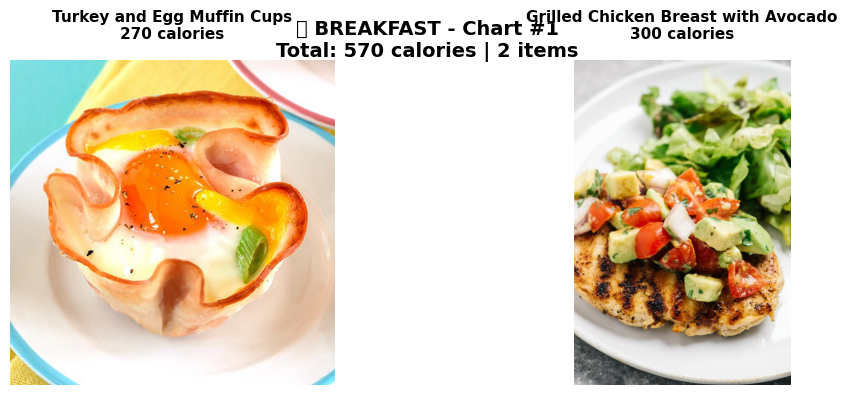


🌞 LUNCH (1260 cal) - Chart #1
-------------------------------------------------------
🔍 Fetching image for: Grilled Chicken with salad
✅ Successfully loaded: Grilled Chicken with salad
🔍 Fetching image for: Chicken Korma with Naan (1 small)
✅ Successfully loaded: Chicken Korma with Naan (1 small)
🔍 Fetching image for: Chicken Shawarma Bowl with Tabbouleh
✅ Successfully loaded: Chicken Shawarma Bowl with Tabbouleh


C:\Users\soume\AppData\Local\Temp\ipykernel_13304\2021656830.py:55: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\soume\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


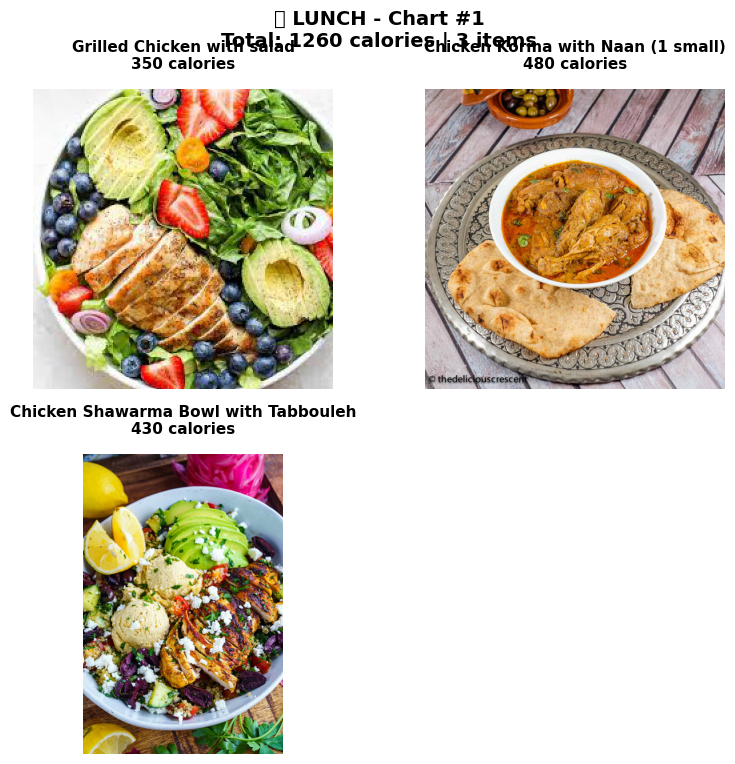


🍎 SNACKS (280 cal) - Chart #1
-------------------------------------------------------
🔍 Fetching image for: Duck Confit Puff Pastry Bites (1 piece)
✅ Successfully loaded: Duck Confit Puff Pastry Bites (1 piece)
🔍 Fetching image for: Anchovy-Stuffed Olives (5 pieces)
✅ Successfully loaded: Anchovy-Stuffed Olives (5 pieces)


C:\Users\soume\AppData\Local\Temp\ipykernel_13304\2021656830.py:55: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\soume\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


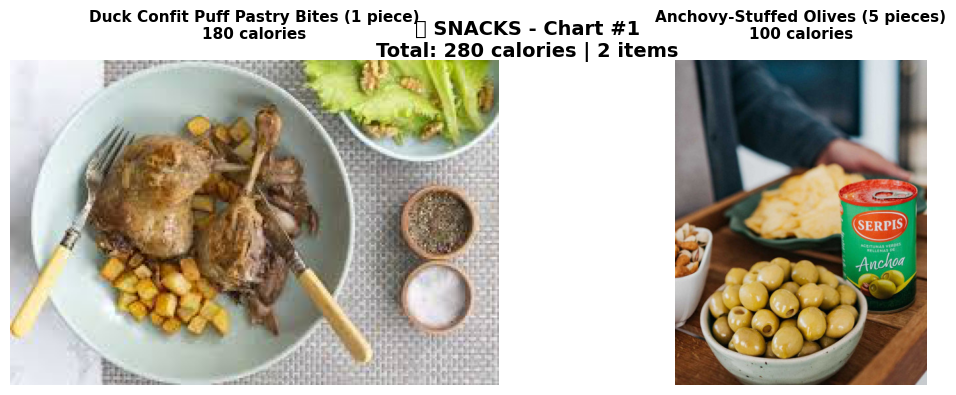


🌙 DINNER (1200 cal) - Chart #1
-------------------------------------------------------
🔍 Fetching image for: Turkey & Cranberry Stuffed Sweet Potatoes
✅ Successfully loaded: Turkey & Cranberry Stuffed Sweet Potatoes
🔍 Fetching image for: Pork Schnitzel with Lemon & Capers
✅ Successfully loaded: Pork Schnitzel with Lemon & Capers
🔍 Fetching image for: Lamb & Feta Stuffed Tomatoes
✅ Successfully loaded: Lamb & Feta Stuffed Tomatoes


C:\Users\soume\AppData\Local\Temp\ipykernel_13304\2021656830.py:55: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\soume\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


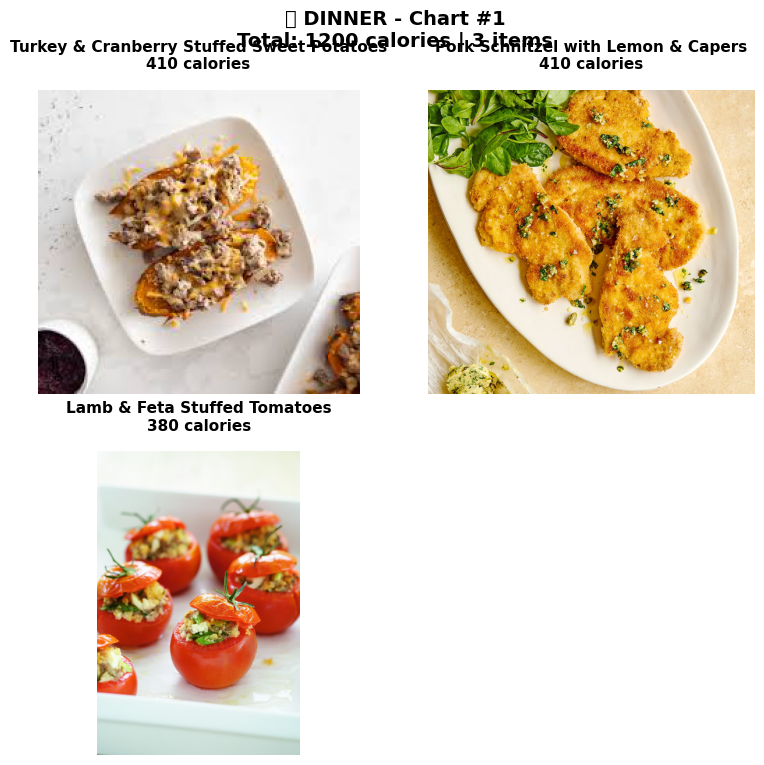


──────────────────────────────────────────────────────────────────────

📊 CALORIE COMPARISON SUMMARY
📈 Chart #1: 3310 calories


In [21]:
# Test function
def test_diet_with_images():
    """Test function with sample data"""
    # Sample result for testing
    sample_result = {
        'risk_probability': 45  # Change this to test different risk levels
    }
    
    integrate_diet_suggestion_with_images(sample_result)

# Uncomment to test:
# test_diet_with_images()

# Use with your actual outcome:
integrate_diet_suggestion_with_images(outcome)